## Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

irirs = load_iris()
X = irirs.data[: , (2,3)] # petal length and petal width
y = (irirs.target==0).astype(int) # Iris Setosa vs Not Iris Setosa

per_clf = Perceptron(max_iter=1000, tol= 1e-3, random_state=42)
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])
print("Predicted class for [2, 0.5]:", y_pred)

Predicted class for [2, 0.5]: [1]


In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def relu(z):
    return np.maximum(0,z)
def derivative(f,z, eps=1e-6):
    return (f(z + eps) - f(z - eps)) / (2 * eps)

(np.float64(-5.0), np.float64(5.0), np.float64(-0.2), np.float64(1.2))

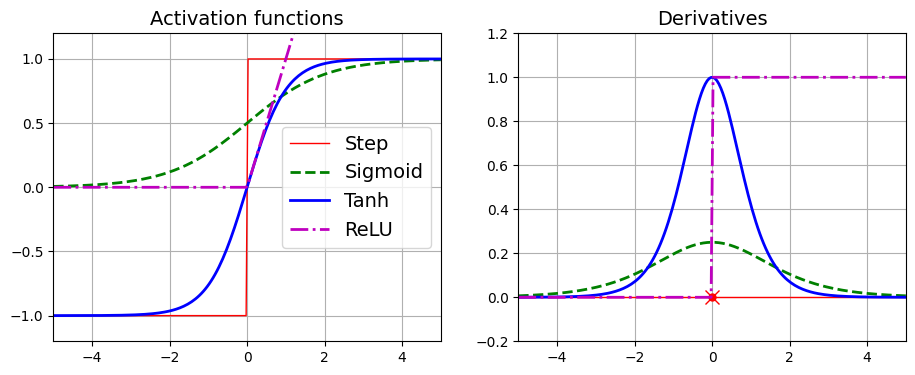

In [3]:
import matplotlib.pyplot as plt
z= np.linspace(-5,5,200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0,0, 'ro', markersize=5) # derivative is undefined at z=0
plt.plot(0,0, "rx", markersize=10) # hide line in legend
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])


In [4]:
def heaviside(z):
    return (z>=0).astype(z.dtype)
def mlp_xor(x1,x2, activation=heaviside):
    return activation(-activation( x1+ x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

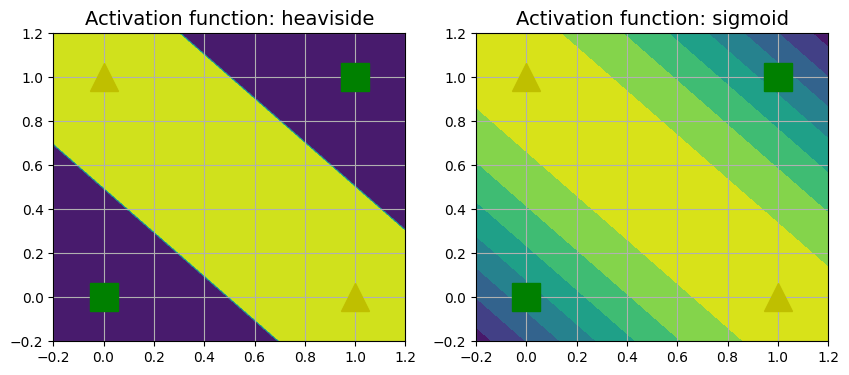

In [5]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)


## Image Classifier

In [6]:
import tensorflow as tf
from tensorflow import keras

c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [9]:
X_valid,X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

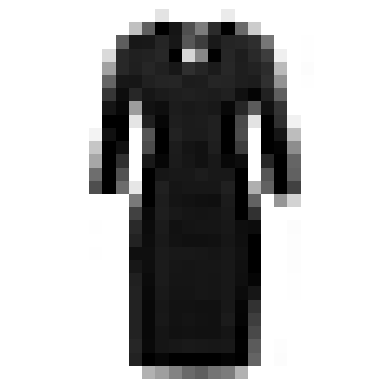

In [10]:
plt.imshow(X_train[69], cmap= "binary")
plt.axis("off")
plt.show()

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

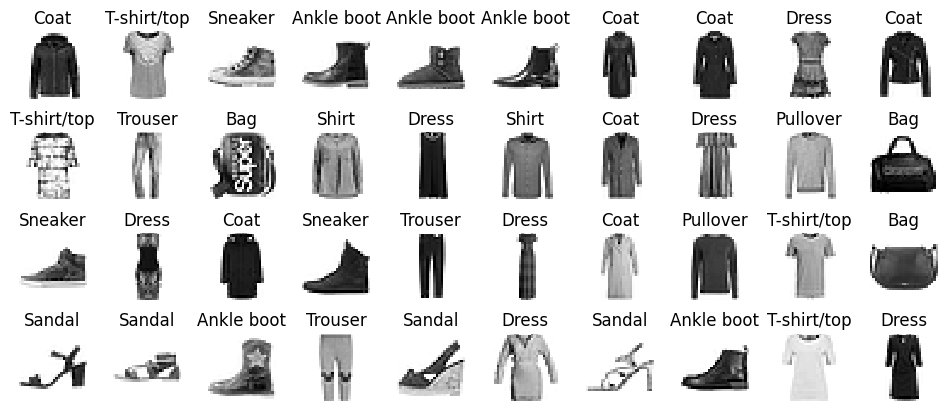

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape= [28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation= "relu"),
    keras.layers.Dense(10, activation= "softmax")
])


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7621 - loss: 0.7231 - val_accuracy: 0.8184 - val_loss: 0.5343
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8300 - loss: 0.4902 - val_accuracy: 0.8426 - val_loss: 0.4633
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8461 - loss: 0.4433 - val_accuracy: 0.8542 - val_loss: 0.4282
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8548 - loss: 0.4151 - val_accuracy: 0.8608 - val_loss: 0.4046
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8614 - loss: 0.3947 - val_accuracy: 0.8660 - val_loss: 0.3873
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8666 - loss: 0.3785 - val_accuracy: 0.8690 - val_loss: 0.3753
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8709 - loss: 0.3651 - val_accuracy: 0.8730 - val_loss: 0.3659
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8736 - loss: 0.3535

In [20]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

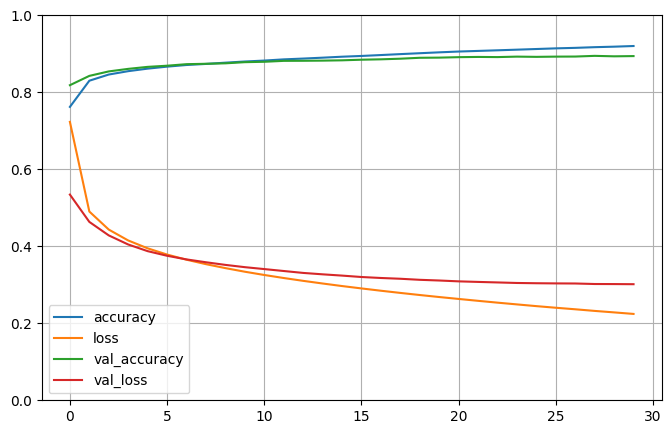

In [22]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8805 - loss: 0.3387


[0.33870208263397217, 0.8805000185966492]

In [24]:
X_new = X_test[:3]
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


array([9, 2, 1])

In [25]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

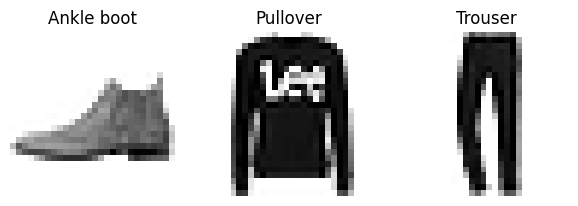

In [26]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Regression MLP

In [27]:

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prefer local file if network is blocked
local_csv = r"g:\ML\Git\practice\data\housing.csv"
if os.path.exists(local_csv):
    housing = pd.read_csv(local_csv)
else:
    url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
    housing = pd.read_csv(url)

housing = housing.drop("ocean_proximity", axis=1)
target_col = "median_house_value"


In [28]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [29]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy="median")
housing['total_bedrooms']= imputer.fit_transform(housing[['total_bedrooms']])

In [30]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [31]:
X = housing.drop(target_col, axis=1).to_numpy(dtype=np.float32)
y = housing[target_col].to_numpy(dtype=np.float32)
y_min, y_max = y.min(), y.max()
y = (y - y_min) / (y_max - y_min)


In [32]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)



In [33]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1143 - val_loss: 0.0683
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0572 - val_loss: 0.0513
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0458 - val_loss: 0.0425
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0394 - val_loss: 0.0370
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0352 - val_loss: 0.0333
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0324 - val_loss: 0.0306
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0303 - val_loss: 0.0287
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0288 - val_loss: 0.0273
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0276 - val_loss: 0.0262
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0267 - val_loss: 0.0253
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0260 - val_loss: 0.0247
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.

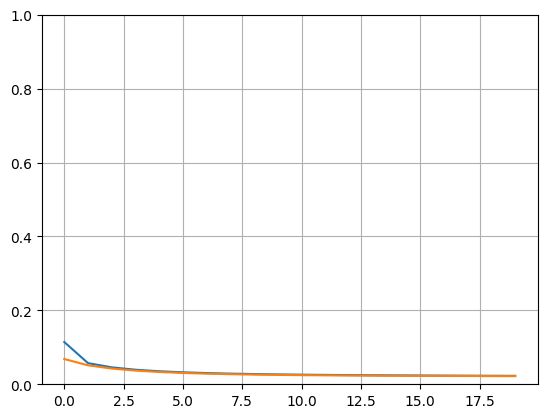

In [34]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
y_pred

array([[0.01807383],
       [0.2669017 ],
       [0.87649   ]], dtype=float32)

## Functional API

In [36]:
np.random.seed(44)
tf.random.set_seed(44)

In [37]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1= keras.layers.Dense(30, activation= "relu")(input_)
hidden2 = keras.layers.Dense(30, activation= "relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_], outputs= [output])

In [38]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 30)        │        270 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 30)        │        930 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ input_layer_2[0]… │
│ (Concatenate)       │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1503 - val_loss: 0.0775
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0571 - val_loss: 0.0510
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0441 - val_loss: 0.0414
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0384 - val_loss: 0.0359
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0348 - val_loss: 0.0323
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0323 - val_loss: 0.0297
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0304 - val_loss: 0.0279
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0290 - val_loss: 0.0265
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0279 - val_loss: 0.0254
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0269 - val_loss: 0.0246
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0262 - val_loss: 0.0239
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

now, if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [40]:
np.random.seed(44)
tf.random.set_seed(44)

In [41]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [42]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1625 - val_loss: 0.0857
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0714 - val_loss: 0.0594
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0555 - val_loss: 0.0508
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0489 - val_loss: 0.0463
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0450 - val_loss: 0.0433
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0421 - val_loss: 0.0409
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0398 - val_loss: 0.0390
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0378 - val_loss: 0.0374
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0361 - val_loss: 0.0360
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0346 - val_loss: 0.0347
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0333 - val_loss: 0.0336
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [43]:
np.random.seed(44)
tf.random.set_seed(44)

In [44]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [45]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [46]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - aux_output_loss: 0.2911 - loss: 0.1951 - main_output_loss: 0.1843 - val_aux_output_loss: 0.2475 - val_loss: 0.0924 - val_main_output_loss: 0.0751
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - aux_output_loss: 0.2169 - loss: 0.0747 - main_output_loss: 0.0589 - val_aux_output_loss: 0.1909 - val_loss: 0.0624 - val_main_output_loss: 0.0481
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - aux_output_loss: 0.1711 - loss: 0.0584 - main_output_loss: 0.0458 - val_aux_output_loss: 0.1545 - val_loss: 0.0534 - val_main_output_loss: 0.0422
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - aux_output_loss: 0.1408 - loss: 0.0512 - main_output_loss: 0.0413 - val_aux_output_loss: 0.1300 - val_loss: 0.0479 - val_main_output_loss: 0.0388
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - aux_output_loss: 0.1199 - loss: 0.0464 - main_output_loss: 0.0382 - val_aux_output_loss: 0.1130 - val_loss: 0.0439 - val_main_output_loss: 0.0362


In [47]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - aux_output_loss: 0.0538 - loss: 0.0284 - main_output_loss: 0.0256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


## The subclassing API

In [51]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
    
model = WideAndDeepModel(30, activation="relu")

In [52]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2173 - mse_loss: 0.5465 - val_loss: 0.1077 - val_mse_loss: 0.4237
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0962 - mse_loss: 0.3556 - val_loss: 0.0811 - val_mse_loss: 0.2844
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0778 - mse_loss: 0.2477 - val_loss: 0.0679 - val_mse_loss: 0.2015
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0667 - mse_loss: 0.1815 - val_loss: 0.0589 - val_mse_loss: 0.1501
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0589 - mse_loss: 0.1395 - val_loss: 0.0524 - val_mse_loss: 0.1175
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0532 - mse_loss: 0.1123 - val_loss: 0.0476 - val_mse_loss: 0.0963
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0489 - mse_loss: 0.0944 - val_loss: 0.0440 - val_mse_loss: 0.0825
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0455 - mse_loss: 0.0824 - val_loss: 0.0412

Saving Restoring 


In [53]:
np.random.seed(44)
tf.random.set_seed(44)


In [56]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
    
])

In [57]:
model.compile(loss="mse", optimizer= keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1434 - val_loss: 0.0854
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0727 - val_loss: 0.0599
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0565 - val_loss: 0.0490
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0487 - val_loss: 0.0430
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0439 - val_loss: 0.0391
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0405 - val_loss: 0.0362
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0379 - val_loss: 0.0340
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0358 - val_loss: 0.0322
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0341 - val_loss: 0.0307
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0326 - val_loss: 0.0294
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0321


In [59]:
model.save("keras_model.keras")

In [60]:
model = keras.models.load_model("keras_model.keras")
model.predict(X_new)

c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


array([[0.12122057],
       [0.24723291],
       [0.4395181 ]], dtype=float32)

In [61]:
keras.backend.clear_session()


## Callbacks during Training

In [62]:
np.random.seed(44)
tf.random.set_seed(44)

In [63]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_model.keras", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("keras_model.keras") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0314 - val_loss: 0.0284
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0303 - val_loss: 0.0274
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0293 - val_loss: 0.0266
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0285 - val_loss: 0.0259
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0278 - val_loss: 0.0253
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0271 - val_loss: 0.0248
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0265 - val_loss: 0.0243
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0260 - val_loss: 0.0238
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0255 - val_loss: 0.0234
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0250 - val_loss: 0.0231
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0248


In [67]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
        

In [78]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0226
val/train: 0.94
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0220 - val_loss: 0.0206


## TensorBoard

In [79]:
root_logdir =  os.path.join(os.curdir, "my_logs")

In [80]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2025_12_29-13_33_48'

In [81]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [82]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1343 - val_loss: 0.0611
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0504 - val_loss: 0.0429
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0399 - val_loss: 0.0361
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0353 - val_loss: 0.0324
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0326 - val_loss: 0.0301
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0308 - val_loss: 0.0284
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0294 - val_loss: 0.0272
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0284 - val_loss: 0.0262
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0276 - val_loss: 0.0254
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0269 - val_loss: 0.0247
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0263 - val_loss: 0.0242
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

## Hyperparameter Tuning

In [85]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):     
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [90]:
from scikeras.wrappers import KerasRegressor

keras_reg = KerasRegressor(model=build_model, verbose=0)

In [92]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


,model,<function bui...0023C79F49940>
,build_fn,None
,warm_start,False
,random_state,None
,optimizer,'rmsprop'
,loss,None
,metrics,None
,batch_size,None
,validation_batch_size,None
,verbose,0
,callbacks,None


In [93]:
mse_test = keras_reg.score(X_test, y_test)

In [94]:
y_pred = keras_reg.predict(X_new)

In [96]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "model__n_hidden": [0, 1, 2, 3],
    "model__n_neurons": np.arange(1, 100).tolist(),
    "model__learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.008171782257177473, model__n_hidden=1, model__n_neurons=28; total time= 1.0min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.008171782257177473, model__n_hidden=1, model__n_neurons=28; total time= 1.0min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.008171782257177473, model__n_hidden=1, model__n_neurons=28; total time= 1.0min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.020037703497088895, model__n_hidden=3, model__n_neurons=29; total time= 1.1min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.020037703497088895, model__n_hidden=3, model__n_neurons=29; total time= 1.1min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.020037703497088895, model__n_hidden=3, model__n_neurons=29; total time= 1.1min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.0210201415256913, model__n_hidden=3, model__n_neurons=68; total time= 1.1min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.0210201415256913, model__n_hidden=3, model__n_neurons=68; total time= 1.1min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.0210201415256913, model__n_hidden=3, model__n_neurons=68; total time= 1.1min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.0031736943328287627, model__n_hidden=2, model__n_neurons=28; total time= 1.2min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.0031736943328287627, model__n_hidden=2, model__n_neurons=28; total time= 1.2min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.0031736943328287627, model__n_hidden=2, model__n_neurons=28; total time= 1.1min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.021434985327558706, model__n_hidden=3, model__n_neurons=75; total time= 1.3min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.021434985327558706, model__n_hidden=3, model__n_neurons=75; total time= 1.1min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.021434985327558706, model__n_hidden=3, model__n_neurons=75; total time= 1.2min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.012846579377771719, model__n_hidden=2, model__n_neurons=23; total time= 1.4min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.012846579377771719, model__n_hidden=2, model__n_neurons=23; total time= 1.2min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.012846579377771719, model__n_hidden=2, model__n_neurons=23; total time= 1.4min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.000348476594310735, model__n_hidden=2, model__n_neurons=15; total time= 1.5min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.000348476594310735, model__n_hidden=2, model__n_neurons=15; total time= 1.7min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.000348476594310735, model__n_hidden=2, model__n_neurons=15; total time= 1.4min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.0014767966815426477, model__n_hidden=1, model__n_neurons=93; total time= 1.6min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.0014767966815426477, model__n_hidden=1, model__n_neurons=93; total time= 1.7min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.0014767966815426477, model__n_hidden=1, model__n_neurons=93; total time= 1.6min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.0016219756291173599, model__n_hidden=0, model__n_neurons=56; total time= 1.5min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.0016219756291173599, model__n_hidden=0, model__n_neurons=56; total time= 1.1min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.0016219756291173599, model__n_hidden=0, model__n_neurons=56; total time=  57.6s


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.016355591896583237, model__n_hidden=2, model__n_neurons=66; total time= 1.0min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.016355591896583237, model__n_hidden=2, model__n_neurons=66; total time= 1.2min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[CV] END model__learning_rate=0.016355591896583237, model__n_hidden=2, model__n_neurons=66; total time= 1.3min


c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KerasRegresso...se epochs=1 )
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'model__learning_rate': [0.0062328688419092835, 0.007272343495031161, ...], 'model__n_hidden': [0, 1, ...], 'model__n_neurons': [1, 2, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used

In [97]:
rnd_search_cv.best_params_

{'model__n_neurons': 75,
 'model__n_hidden': 3,
 'model__learning_rate': 0.021434985327558706}

In [100]:
model = rnd_search_cv.best_estimator_.model_
model

<Sequential name=sequential_31, built=True>

In [101]:
model.evaluate(X_test, y_test)

  1/162 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0161

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0132


0.013224815018475056